In [328]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

About Dataset
    The Titanic Passenger dataset provides information about passengers who were aboard the RMS Titanic during its ill-fated maiden voyage. This dataset is often used for exploring patterns and factors associated with survival on the Titanic.

The dataset includes the following columns:
    PassengerId: Unique identifier for each passenger.
    Survived: Survival status of the passenger (0 = Not Survived, 1 = Survived).
    Pclass: Passenger class (1 = First class, 2 = Second class, 3 = Third class).
    Sex: Gender of the passenger.
    Age: Age of the passenger.
    SibSp: Number of siblings/spouses aboard the Titanic.
    Parch: Number of parents/children aboard the Titanic.
    Fare: Fare paid by the passenger.
    Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [329]:
passengers = pd.read_csv('SVMtrain.csv', sep=',')

In [330]:
passengers.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,3
3,4,1,1,female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [331]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.6+ KB


There are no null cells.

In [332]:
passengers.shape

(889, 9)

Dataset has 889 rows and 9 columns.

Data Preprocessing
Change 'female' to 'Female'.
Sex column is object, so we should convert data to int.

In [333]:
# Change values in a column
passengers['Sex'] = passengers['Sex'].replace({'female': 'Female'})

In [334]:
passengers.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,Male,22.0,1,0,7.2500,3
1,2,1,1,Female,38.0,1,0,71.2833,1
2,3,1,3,Female,26.0,0,0,7.9250,3
3,4,1,1,Female,35.0,1,0,53.1000,3
4,5,0,3,Male,35.0,0,0,8.0500,3


In [335]:
# Define a mapping dictionary for each non-numeric categorical variable
sex_mapping = {'Male': 0, 'Female': 1}
passengers['Sex'] = passengers['Sex'].map(sex_mapping)

In [336]:
passengers.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.350956,35.686355,0.524184,0.382452,32.096681,2.535433
std,256.998173,0.486260,0.834700,0.477538,17.756733,1.103705,0.806761,49.697504,0.792088
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800,2.000000
50%,446.000000,0.000000,3.000000,0.000000,32.000000,0.000000,0.000000,14.454200,3.000000
75%,668.000000,1.000000,3.000000,1.000000,54.000000,1.000000,0.000000,31.000000,3.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000


In [337]:
passengers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.6 KB


Data normalization

In [338]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
passengers = pd.DataFrame(scaler.fit_transform(passengers), columns=passengers.columns)

In [339]:
passengers.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.500000,0.382452,0.655793,0.350956,0.443156,0.065523,0.063742,0.062649,0.767717
std,0.288762,0.486260,0.417350,0.477538,0.223131,0.137963,0.134460,0.097003,0.396044
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250562,0.000000,0.500000,0.000000,0.271174,0.000000,0.000000,0.015412,0.500000
50%,0.500000,0.000000,1.000000,0.000000,0.396833,0.000000,0.000000,0.028213,1.000000
75%,0.749438,1.000000,1.000000,1.000000,0.673285,0.125000,0.000000,0.060508,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [340]:
# Separate features and target variable
features = passengers.drop("Survived", axis=1)
target = passengers["Survived"]

In [341]:
features

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.000000,1.0,0.0,0.271174,0.125,0.000000,0.014151,1.0
1,0.001124,0.0,1.0,0.472229,0.125,0.000000,0.139136,0.0
2,0.002247,1.0,1.0,0.321438,0.000,0.000000,0.015469,1.0
3,0.003371,0.0,1.0,0.434531,0.125,0.000000,0.103644,1.0
4,0.004494,1.0,0.0,0.434531,0.000,0.000000,0.015713,1.0
...,...,...,...,...,...,...,...,...
884,0.995506,0.5,0.0,0.334004,0.000,0.000000,0.025374,1.0
885,0.996629,0.0,1.0,0.233476,0.000,0.000000,0.058556,1.0
886,0.997753,1.0,1.0,0.748681,0.125,0.333333,0.045771,1.0
887,0.998876,0.0,0.0,0.321438,0.000,0.000000,0.058556,0.0


In [342]:
target

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
884    0.0
885    1.0
886    0.0
887    1.0
888    0.0
Name: Survived, Length: 889, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

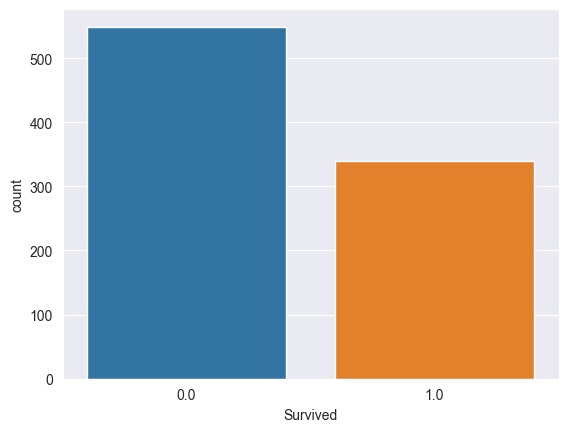

In [343]:
sns.countplot(data = passengers, x = 'Survived')

In [344]:
scaler = StandardScaler()
features = scaler.fit_transform(features)

Spit data to train and test.

In [345]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.2)

In [346]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((711, 8), (711,), (178, 8), (178,))

In [347]:
model = KNN()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [348]:
acc1 = accuracy_score(y_test, y_pred)

In [349]:
acc1

0.7696629213483146

In [350]:
k_values = list(range(1,25))
accuracy_list = []
for k in k_values:
    m = KNN(n_neighbors=k)
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))

<Axes: >

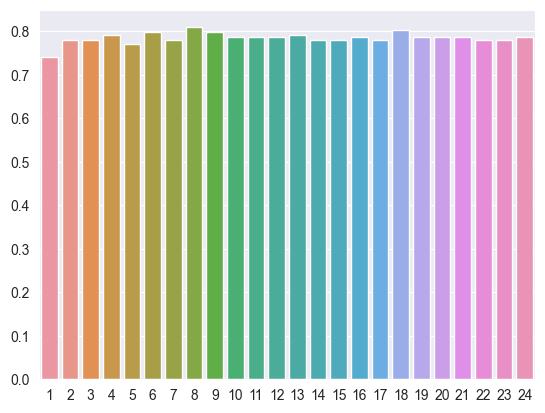

In [351]:
sns.barplot(data = { 'k_values': k_values, 'accuracy': accuracy_list }, x = 'k_values', y = 'accuracy')

The histogram describes how accuracy changes by count of neighbors.
The highest accuracy - 18 neighbors, the lowest - 1 neighbor.

In [352]:
model = KNN(n_neighbors = 18)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc1 = accuracy_score(y_test, y_pred)

Define hyperparameters possible values

In [353]:
c_values = [0.001,0.01,0.1,1,10,100,1000]
solvers = ['newton-cg', 'lbfgs', 'liblinear']

<Axes: >

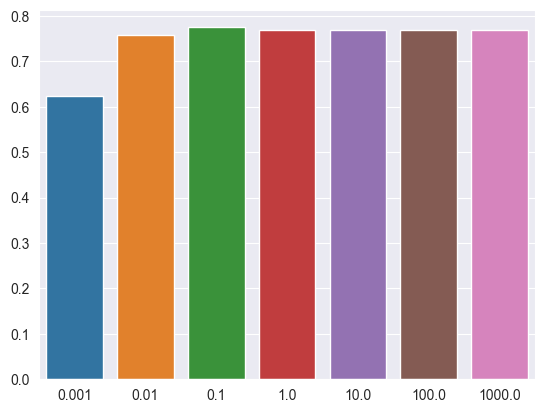

In [354]:
accuracy_list = []
for c in c_values:
    # Create an instance of the LogisticRegression model
    model = LogisticRegression(C=c)
    # Fit the model to the training data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))
sns.barplot(data = { 'C': c_values, 'accuracy': accuracy_list }, x = 'C', y = 'accuracy')

In [355]:
accuracy_list

[0.6235955056179775,
 0.7584269662921348,
 0.7752808988764045,
 0.7696629213483146,
 0.7696629213483146,
 0.7696629213483146,
 0.7696629213483146]

<Axes: >

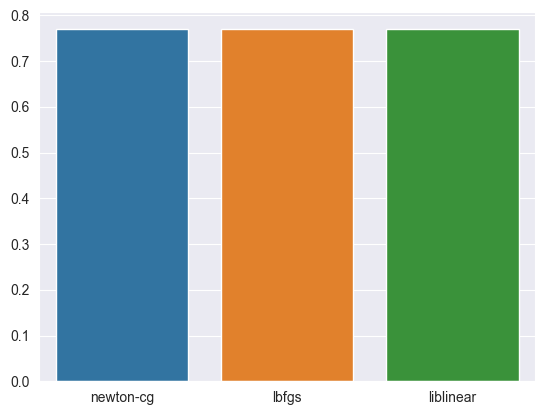

In [356]:
accuracy_list = []
for solver in solvers:
    # Create an instance of the LogisticRegression model
    model = LogisticRegression(solver=solver)
    # Fit the model to the training data
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))
sns.barplot(data = { 'solver': solvers, 'accuracy': accuracy_list }, x = 'solver', y = 'accuracy')

In [357]:
accuracy_list

[0.7696629213483146, 0.7696629213483146, 0.7696629213483146]

The overfit C is 0.1 and underfit C is 0.001.
The solvers are same.

Use GridSearch to find the best values of hyperparameters.

In [366]:
params = {
    'penalty': ['l1','l2','elasticnet'],
    'C': c_values,
    'solver': solvers,
}
# disabling all the python warnings in notebook
import warnings
warnings.filterwarnings('ignore')

clf = GridSearchCV(
    LogisticRegression(),
    param_grid = params,
    scoring='accuracy',
    cv=5,                 
)

clf.fit(X_train,y_train)
best_params = clf.best_params_
best_score = clf.best_score_

In [367]:
best_params

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [368]:
best_score

0.8031123805771692

In [369]:
logreg = LogisticRegression(C=best_params['C'], solver=best_params['solver'])
logreg.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='newton-cg')

In [362]:
logreg.score(X_test, y_test)

0.7752808988764045

In [363]:
y_pred = logreg.predict(X_test)

In [364]:
acc2 = accuracy_score(y_test, y_pred)

In [365]:
acc2

0.7752808988764045

Results

The overfit parameters: count_neighbors = 18, C = 0.1.
The underfit parameters: count_neighbors = 1, C = 0.001.

The best parameters: C = 0.1, penalty = 'l2', solver = 'newton-cg'.